# 🎯 **Use Case: Predicting User Visit Mode**

> *Aim:*
- Create a classification model to predict the mode of visit (e.g., business, family, couples, friends) based on user and attraction data.

> *Use Case:*
- Travel platforms can use this model to tailor marketing campaigns. For instance, if a user is predicted to travel with family, family-friendly packages can be promoted.
- Hotels and attraction organizers can plan resources (e.g., amenities) better based on predicted visitor types.

> *Inputs (Features):*
- User demographics: Continent, region, country, city.
- Attraction characteristics: Type, popularity, previous visitor demographics.
- Historical visit data: Month, year, previous visit modes.

> *Target:*
- Visit mode (categories: Business, Family, Couples, Friends, etc.).


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import pickle

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Preprocessing & Model Selection, Model Evaluation metrics(MAE, MSE, r2_Score)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [10]:
# Load preprocessed dataset
Tourism_data = pd.read_csv("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/DataSets/PreProcessed_DataSet/Pre_Processed_DataSet.csv")

In [11]:
Tourism_data.head(2)

,UserId,TransactionId,VisitYear,VisitMonth,Rating,VisitDate,VisitMode,Attraction,AttractionAddress,AttractionType,CityName,Country,Region,Continent,Average rating per user,Total visits by VisitMode per user,Average rating per attraction,Total visits per user
0,70456,3,2022,10,1.0,2022-10-01,Couples,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Kerala,India,South East Asia,Asia,1.0,1,0.663674,1
1,7567,8,2022,10,1.0,2022-10-01,Friends,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",Nature & Wildlife Areas,Belleville,Canada,South America,America,1.0,1,0.663674,1


In [12]:
#Drop Unnecessary Columns
Tourism_data.drop(['Attraction','AttractionAddress','TransactionId','VisitDate','Rating','Total visits by VisitMode per user','Total visits per user','Average rating per user','Average rating per attraction'], axis= 1, inplace= True)

In [13]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,VisitMode,AttractionType,CityName,Country,Region,Continent
0,70456,2022,10,Couples,Nature & Wildlife Areas,Kerala,India,South East Asia,Asia
1,7567,2022,10,Friends,Nature & Wildlife Areas,Belleville,Canada,South America,America


In [14]:
Tourism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62223 entries, 0 to 62222
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UserId          62223 non-null  int64 
 1   VisitYear       62223 non-null  int64 
 2   VisitMonth      62223 non-null  int64 
 3   VisitMode       62223 non-null  object
 4   AttractionType  62223 non-null  object
 5   CityName        62223 non-null  object
 6   Country         62223 non-null  object
 7   Region          62223 non-null  object
 8   Continent       62223 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.3+ MB


In [15]:
# Specify columns to encode
encoding_columns = Tourism_data[['VisitMode', 'AttractionType', 'CityName','Country', 'Region', 'Continent']]
encoding_columns.head()

,VisitMode,AttractionType,CityName,Country,Region,Continent
0,Couples,Nature & Wildlife Areas,Kerala,India,South East Asia,Asia
1,Friends,Nature & Wildlife Areas,Belleville,Canada,South America,America
2,Family,Nature & Wildlife Areas,Squamish,Canada,South America,America
3,Family,Nature & Wildlife Areas,Innisfil,Canada,South America,America
4,Couples,Nature & Wildlife Areas,Crown Point,United States,South America,America


In [16]:
encoding_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62223 entries, 0 to 62222
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   VisitMode       62223 non-null  object
 1   AttractionType  62223 non-null  object
 2   CityName        62223 non-null  object
 3   Country         62223 non-null  object
 4   Region          62223 non-null  object
 5   Continent       62223 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


In [17]:
encoders = {}

for column in encoding_columns:
    le = LabelEncoder()
    Tourism_data[column] = le.fit_transform(Tourism_data[column]) #Fit and encode the column
    encoders[column] = le #Store encoder for future use

In [18]:
encoders

{'VisitMode': LabelEncoder(),
 'AttractionType': LabelEncoder(),
 'CityName': LabelEncoder(),
 'Country': LabelEncoder(),
 'Region': LabelEncoder(),
 'Continent': LabelEncoder()}

- **Saving the encoder.pkl file:**

In [19]:
import pickle
with open ("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/encoder_visit_mode.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [20]:
Tourism_data.head(2)

,UserId,VisitYear,VisitMonth,VisitMode,AttractionType,CityName,Country,Region,Continent
0,70456,2022,10,1,8,2266,46,14,2
1,7567,2022,10,3,8,425,21,12,1


- ***Define features and target***

In [21]:
#Define features and target:
x = Tourism_data.drop(columns=['VisitMode'])
y = Tourism_data['VisitMode']

In [22]:
x.head(2)

,UserId,VisitYear,VisitMonth,AttractionType,CityName,Country,Region,Continent
0,70456,2022,10,8,2266,46,14,2
1,7567,2022,10,8,425,21,12,1


In [23]:
y.head(2)

0    1
1    3
Name: VisitMode, dtype: int64

In [24]:
x.shape, y.shape

((62223, 8), (62223,))

- ***Model Training: Train/test split***

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state= 5)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((49778, 8), (12445, 8), (49778,), (12445,))

In [27]:
x_train

,UserId,VisitYear,VisitMonth,AttractionType,CityName,Country,Region,Continent
18132,10647,2017,1,15,3951,77,10,1
6247,49307,2017,2,8,654,108,12,1
26650,59122,2018,7,2,4533,108,12,1
26496,35481,2019,1,2,4981,108,12,1
23646,29600,2018,2,2,1222,108,12,1
...,...,...,...,...,...,...,...,...
35814,87907,2014,3,11,1921,26,8,2
59069,56404,2017,6,0,547,108,12,1
20463,76725,2016,1,15,4506,49,13,2
18638,38279,2016,9,15,3950,108,12,1


In [28]:
y_train

18132    2
6247     1
26650    1
26496    2
23646    1
        ..
35814    2
59069    2
20463    2
18638    3
35683    1
Name: VisitMode, Length: 49778, dtype: int64

In [29]:
x_test

,UserId,VisitYear,VisitMonth,AttractionType,CityName,Country,Region,Continent
15779,85715,2019,10,15,5379,46,14,2
45172,16975,2016,3,16,1366,21,12,1
41810,62812,2015,10,10,2435,56,13,2
9983,79590,2015,11,8,485,108,12,1
58665,47370,2014,6,1,1541,21,12,1
...,...,...,...,...,...,...,...,...
29061,61864,2018,8,2,3370,7,11,3
51532,56377,2016,10,2,1366,21,12,1
22766,6371,2020,3,2,3951,77,10,1
60278,50878,2018,4,6,547,108,12,1


In [30]:
y_test

15779    2
45172    1
41810    1
9983     3
58665    4
        ..
29061    2
51532    4
22766    1
60278    4
50401    1
Name: VisitMode, Length: 12445, dtype: int64

- Defining Models:

In [32]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm_model = LGBMClassifier(random_state=42)

- Hyperparameter tuning using RandomizedSearchCV

In [33]:
# 1. Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)


# 2.  XGBoost with Hyperparameter Tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)



# 3. LightGBM with Hyperparameter Tuning
lgbm_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.7, 0.8, 1.0]
}

lgbm_search = RandomizedSearchCV(lgbm_model, lgbm_param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy', verbose=1, n_jobs=-1)


- Fit the RandomizedSearchCV Models

In [34]:
rf_search.fit(x_train, y_train)
xgb_search.fit(x_train, y_train)
lgbm_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\dhars\Downloads\Dhass\codeing\GUVI\2. MainBoot\4.Project_Code\Project4\Project4_Code\Tourism_Experince_Analytics\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:40:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 49778, number of used features: 8
[LightGBM] [Info] Start training from score -4.336819
[LightGBM] [Info] Start training from score -0.916050
[LightGBM] [Info] Start training from score -1.248783
[LightGBM] [Info] Start training from score -1.561258
[LightGBM] [Info] Start training from score -2.406835
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

,estimator,LGBMClassifie...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [-1, 10, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [31, 50, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


- Best Parametrs of the Models:

In [35]:
print("\nBest Random Forest Params:", rf_search.best_params_)
print("\nBest XGBoost Params:", xgb_search.best_params_)
print("\nBest LightGBM Params:", lgbm_search.best_params_)


Best Random Forest Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Best LightGBM Params: {'subsample': 1.0, 'num_leaves': 100, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.2}


- Best estimator of the Models:

In [36]:
rf_search.best_estimator_ #It will show the best parameters of the model

,n_estimators,500
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
xgb_search.best_estimator_ 

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [38]:
lgbm_search.best_estimator_ 

,boosting_type,'gbdt'
,num_leaves,100
,max_depth,10
,learning_rate,0.2
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [39]:
# Get predictions
y_pred_rf = rf_search.best_estimator_.predict(x_test)
y_pred_xgb = xgb_search.best_estimator_.predict(x_test)
y_pred_lgbm = lgbm_search.best_estimator_.predict(x_test)


In [40]:
y_pred_rf

array([2, 1, 1, ..., 1, 1, 1], shape=(12445,))

In [41]:
y_pred_xgb

array([1, 1, 1, ..., 1, 1, 1], shape=(12445,))

In [42]:
y_pred_lgbm

array([2, 1, 1, ..., 1, 1, 1], shape=(12445,))

In [51]:
# Store results
results = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgbm)
        ]
    }


# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy
0,Random Forest,0.641061
1,XGBoost,0.648775
2,LightGBM,0.650944


In [57]:
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))

print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52       151
           1       0.63      0.78      0.70      5007
           2       0.66      0.63      0.64      3494
           3       0.62      0.49      0.55      2650
           4       0.72      0.44      0.54      1143

    accuracy                           0.64     12445
   macro avg       0.65      0.56      0.59     12445
weighted avg       0.64      0.64      0.63     12445


XGBoost Results:
              precision    recall  f1-score   support

           0       0.71      0.44      0.55       151
           1       0.65      0.78      0.71      5007
           2       0.65      0.65      0.65      3494
           3       0.63      0.51      0.56      2650
           4       0.74      0.43      0.55      1143

    accuracy                           0.65     12445
   macro avg       0.67      0.56      0.60     12445
weighted avg       0.65      0.65  

In [58]:
print("\nLightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))


LightGBM Results:
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       151
           1       0.65      0.77      0.71      5007
           2       0.65      0.65      0.65      3494
           3       0.62      0.52      0.57      2650
           4       0.74      0.46      0.57      1143

    accuracy                           0.65     12445
   macro avg       0.67      0.57      0.61     12445
weighted avg       0.65      0.65      0.65     12445



- Save the Best Models

In [60]:
# Save each model to a file
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_rf_model.pkl", "wb") as f:
    pickle.dump(rf_search.best_estimator_, f)

with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_search.best_estimator_, f)

with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_lgbm_model.pkl", "wb") as f:
    pickle.dump(lgbm_search.best_estimator_, f)

- Saving the pkl file in joblib to deploy in cloud purpose:

In [61]:
from joblib import dump
from joblib import load
import pickle

In [62]:
# Load encoders
with open('C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/encoder_visit_mode.pkl', 'rb') as f:
    e = pickle.load(f)

# Save it using joblib with compression
dump(e, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/encoder_visit_mode.joblib", compress=3)

encoders = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/encoder_visit_mode.joblib")

In [63]:
# Load random_Forest_regressor_model
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_rf_model.pkl", 'rb') as f:
    r = pickle.load(f)

# Save it using joblib with compression
dump(r, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_rf_model.joblib", compress=3)

rf = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_rf_model.joblib")

In [64]:
# Load xgb_model
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_xgb_model.pkl", 'rb') as f:
    r = pickle.load(f)

# Save it using joblib with compression
dump(r, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_xgb_model.joblib", compress=3)

xgb = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_xgb_model.joblib")

In [65]:
# Load xgb_model
with open("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_lgbm_model.pkl", 'rb') as f:
    r = pickle.load(f)

# Save it using joblib with compression
dump(r, "C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_lgbm_model.joblib", compress=3)

lgbm = load("C:/Users/dhars/Downloads/Dhass/codeing/GUVI/2. MainBoot/4.Project_Code/Project4/Project4_Code/Tourism_Experince_Analytics/models/Classification_Task_Model/best_lgbm_model.joblib")

- Confusion Matrix:

How many crt values which model predicted and how many wrong values which model predicted?
To predict this we are using confusion matrix

- #For Random Forest:

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#For Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[  68,   37,   21,   21,    4],
       [  15, 3912,  624,  380,   76],
       [   7,  935, 2192,  290,   70],
       [  12,  894,  394, 1307,   43],
       [   7,  415,  110,  112,  499]])

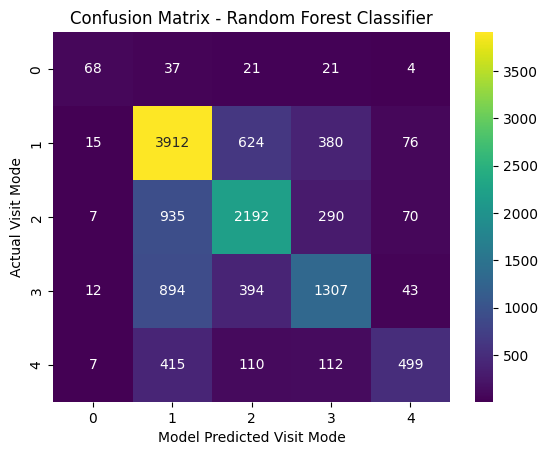

In [80]:
sns.heatmap(cm_rf, annot= True, fmt= 'g', cmap= 'viridis')

plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Model Predicted Visit Mode")
plt.ylabel("Actual Visit Mode")

plt.show()

- For XGBoost

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#For XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb

array([[  67,   27,   30,   21,    6],
       [   5, 3891,  652,  387,   72],
       [   5,  889, 2281,  268,   51],
       [  11,  824,  426, 1340,   49],
       [   6,  398,  125,  119,  495]])

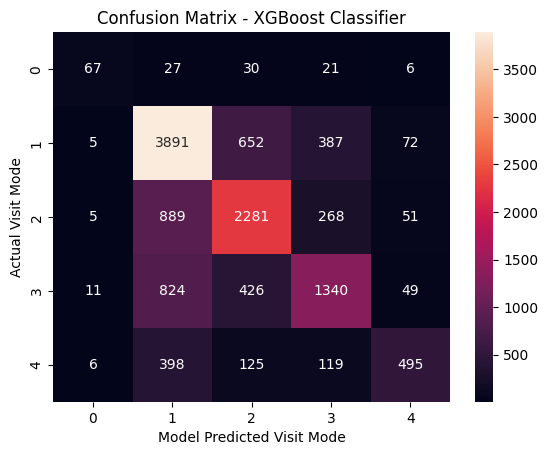

In [82]:
sns.heatmap(cm_xgb, annot= True, fmt= 'g')

plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Model Predicted Visit Mode")
plt.ylabel("Actual Visit Mode")

plt.show()

- For LightGBM:

In [83]:
#For XGBoost
cm_lgbm = confusion_matrix(y_test, y_pred_xgb)
cm_lgbm

array([[  67,   27,   30,   21,    6],
       [   5, 3891,  652,  387,   72],
       [   5,  889, 2281,  268,   51],
       [  11,  824,  426, 1340,   49],
       [   6,  398,  125,  119,  495]])

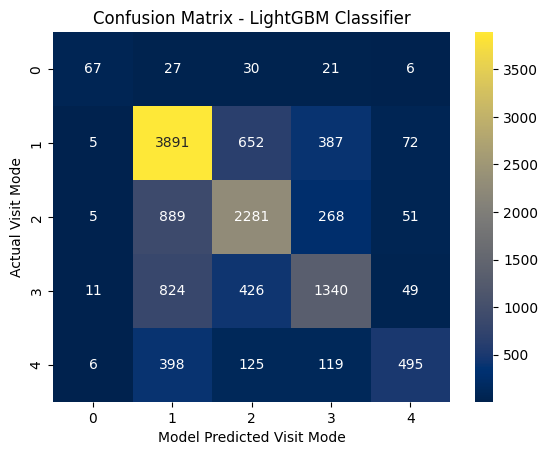

In [90]:
sns.heatmap(cm_lgbm, annot= True, fmt= 'g', cmap='cividis')

plt.title("Confusion Matrix - LightGBM Classifier")
plt.xlabel("Model Predicted Visit Mode")
plt.ylabel("Actual Visit Mode")

plt.show()